In [101]:
# Import Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [102]:
# declare file path
citydata_csv = "raw_data/city_data.csv"
ridedata_csv = "raw_data/ride_data.csv"

In [103]:
# read data file
citydata_df = pd.read_csv(citydata_csv)
ridedata_df = pd.read_csv(ridedata_csv)

In [104]:
# check sample data
citydata_df.head()

,city,driver_count,type
0,Tammyburgh,11,Urban
1,Melissaborough,15,Urban
2,Port Brianborough,62,Urban
3,New Katherine,68,Urban
4,Lake Charlesside,65,Urban


In [105]:
# check sample data
ridedata_df.head()

,city,date,fare,ride_id
0,Karenfurt,2017-01-01 19:03:03,32.90,3383346995405
1,Melissaborough,2017-01-01 08:55:58,19.59,2791839504576
2,Port Sandraport,2017-01-01 16:21:54,31.04,3341437383289
3,Curtismouth,2017-01-03 06:36:53,15.12,6557246300691
4,Port Michael,2017-01-03 09:56:52,19.65,9887635746234


In [106]:
# merge the two dataframes based on common field city
cityride_df = pd.merge(ridedata_df, citydata_df, on="city")
cityride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Karenfurt,2017-01-01 19:03:03,32.90,3383346995405,19,Urban
1,Karenfurt,2017-01-01 05:30:46,22.47,18848561829,19,Urban
2,Karenfurt,2017-01-02 21:58:48,4.73,7929949609958,19,Urban
3,Karenfurt,2017-01-01 03:36:42,21.65,2940464578531,19,Urban
4,Karenfurt,2017-01-03 04:34:51,34.87,2170143080929,19,Urban


In [107]:
# group data by city
city_group = cityride_df.groupby('city')

# get total ride per city
totalride_percity = city_group['ride_id'].count()

# get average fare per city
avgfare_percity = city_group['fare'].mean()

In [108]:
# Create empty dataframe
df = pd.DataFrame()

# Add summarized columns
df['totalride_percity'] = totalride_percity
df['avgfare_percity'] = avgfare_percity
df.head()

,totalride_percity,avgfare_percity
city,,
Adamschester,9,29.594444
Alexisfort,33,27.366970
Amberberg,16,28.624375
Anthonyfurt,17,29.491176
Boyleberg,5,32.396000


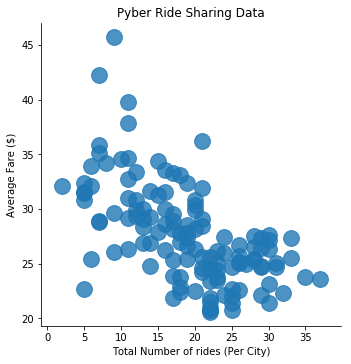

In [109]:
# use seaborn library to plot
display = sns.lmplot('totalride_percity', 'avgfare_percity',data = df, fit_reg=False, scatter_kws={"marker": "D",
                        "s": 250})
display.set(xlabel='Total Number of rides (Per City)', ylabel='Average Fare ($)', title = 'Pyber Ride Sharing Data')


In [110]:
# group data by 'city type'
type_group = cityride_df.groupby('type')

# get total fare by city type
totalfare_sum = type_group['fare'].sum()
totalfare_sum

type
Rural        4271.69
Suburban    18779.26
Urban       40093.25
Name: fare, dtype: float64

In [111]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["yellow", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0)


Text(0.5,1,'% of Total Fares by City Type')

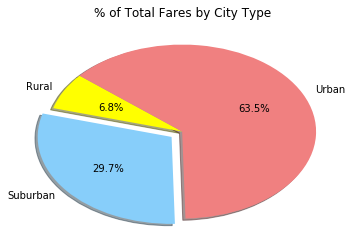

In [112]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(totalfare_sum, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Fares by City Type')

In [113]:
# get total ride by city type
totalride_count = type_group['ride_id'].count()
totalride_count


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

Text(0.5,1,'% of Total Rides by City Type')

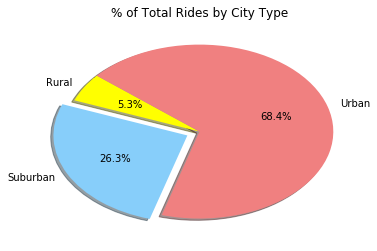

In [114]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(totalride_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Rides by City Type')

In [115]:
# get total drivers by city type
totaldriver_sum = type_group['driver_count'].sum()
totaldriver_sum

type
Rural         662
Suburban     8774
Urban       60935
Name: driver_count, dtype: int64

Text(0.5,1,'% of Total Drivers by City Type')

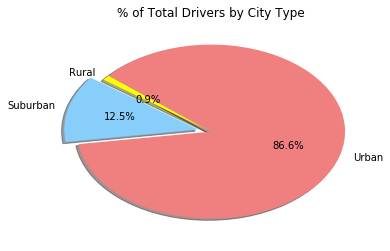

In [116]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(totaldriver_sum, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Drivers by City Type')